In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Load Data 

In [8]:
df = pd.read_csv('bank_full.csv') 

In [9]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# EDA

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(45211, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [13]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [14]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [15]:
 df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [17]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,"45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00"
mean,40.94,"1,362.27",15.81,258.16,2.76,40.20,0.58
std,10.62,"3,044.77",8.32,257.53,3.10,100.13,2.30
min,18.00,"-8,019.00",1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,"1,428.00",21.00,319.00,3.00,-1.00,0.00
max,95.00,"102,127.00",31.00,"4,918.00",63.00,871.00,275.00


In [18]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

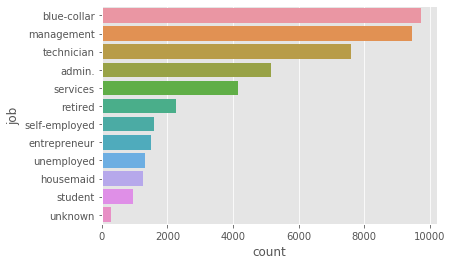

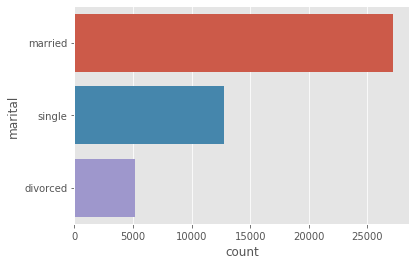

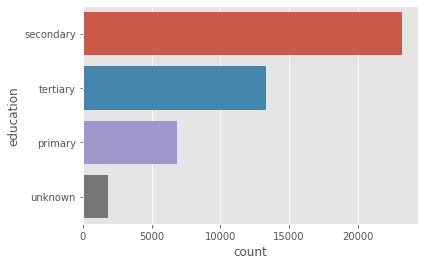

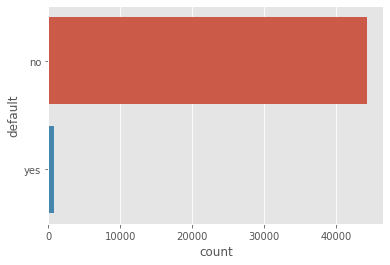

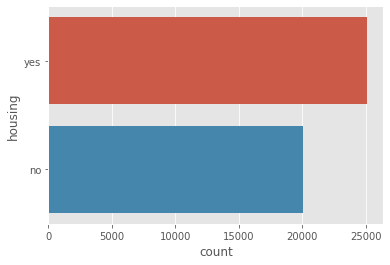

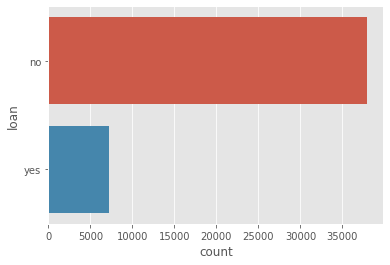

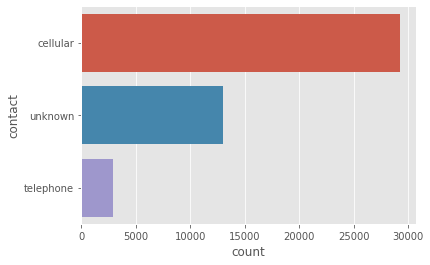

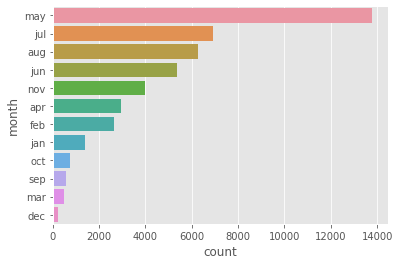

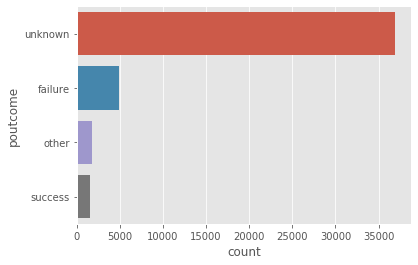

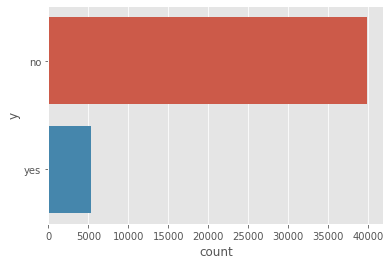

In [16]:
for feature in df.dtypes[df.dtypes == 'category'].index:
    sns.countplot(y=feature, data=df, order = df[feature].value_counts().index)
    plt.show()

no    88.30
yes   11.70
Name: y, dtype: float64



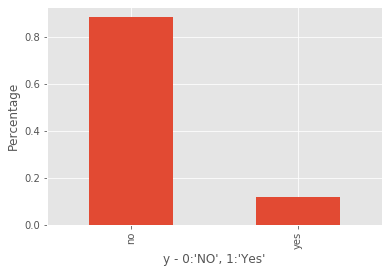

In [19]:
print(df['y'].value_counts(normalize=True)*100)
print()
df['y'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("y - 0:'NO', 1:'Yes'")
plt.ylabel("Percentage")
plt.show()



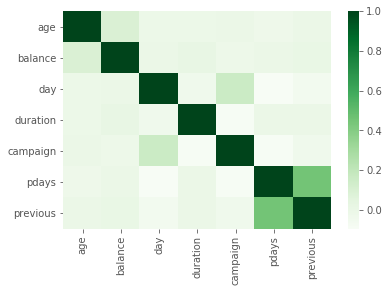

In [20]:
correlations = df.corr()
_ = sns.heatmap(correlations, cmap="Greens")

# Create clean version of the data

In [21]:
df_clean = df.copy()
df_clean = df_clean[df_clean.job != 'unknown']
df_clean = df_clean[df_clean.marital != 'unknown']
df_clean = df_clean[df_clean.education != 'unknown']
df_clean = df_clean[df_clean.education != 'illiterate']

In [22]:
del df_clean['default']

In [23]:
del df_clean['duration']

In [24]:
df_clean = df_clean[df_clean.housing != 'unknown']
df_clean = df_clean[df_clean.loan != 'unknown']

In [25]:
a = df_clean.poutcome.value_counts()
print(a)

unknown    35286
failure     4709
other       1774
success     1424
Name: poutcome, dtype: int64


In [26]:
c = df_clean.previous.value_counts()
print(c)

0      35281
1       2651
2       2004
3       1096
4        693
5        443
6        268
7        195
8        127
9         88
10        63
11        60
12        42
13        36
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         4
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64


In [27]:
df_clean = df_clean.dropna()

In [28]:
df_clean.to_csv('clean_data.csv')

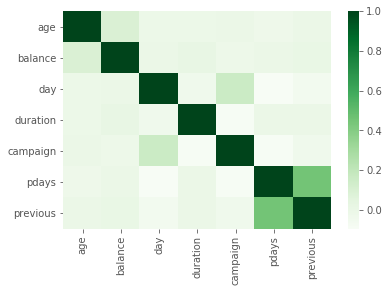

In [29]:
correlations1 = df_clean.corr()
_ = sns.heatmap(correlations, cmap="Greens")

# Create dummies and Univariate/Multivariate analysis

In [30]:
df_clean = pd.get_dummies(df_clean, drop_first=True)
df_clean.head()

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,1,-1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
5,35,231,5,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
6,28,447,5,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [31]:
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month', 'poutcome']
df[cols_cat]
cols_new_cat=pd.get_dummies(df[cols_cat],drop_first = False)
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


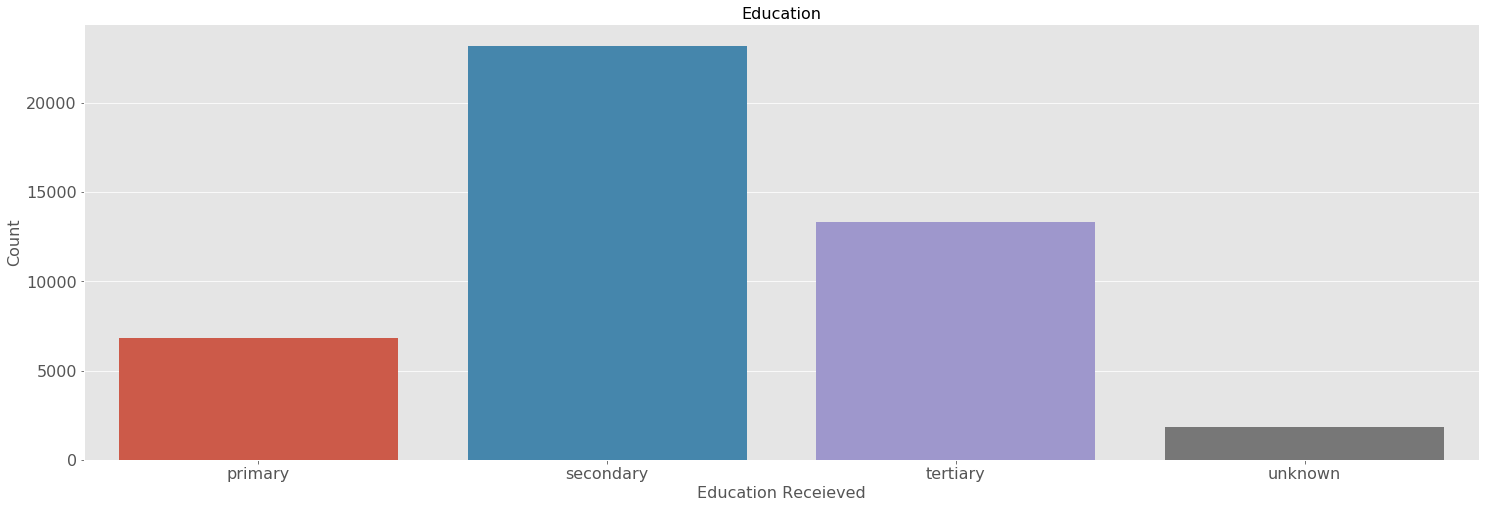

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'education', data = df[cols_cat])
ax.set_xlabel('Education Receieved', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Education', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

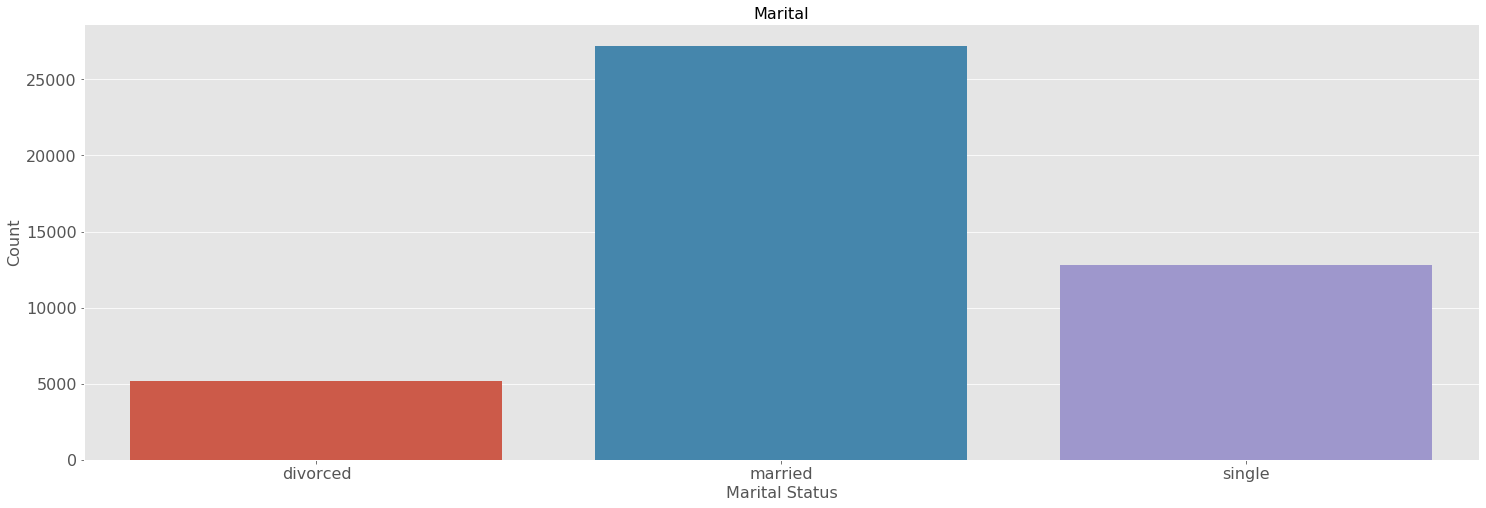

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'marital', data = df[cols_cat])
ax.set_xlabel('Marital Status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

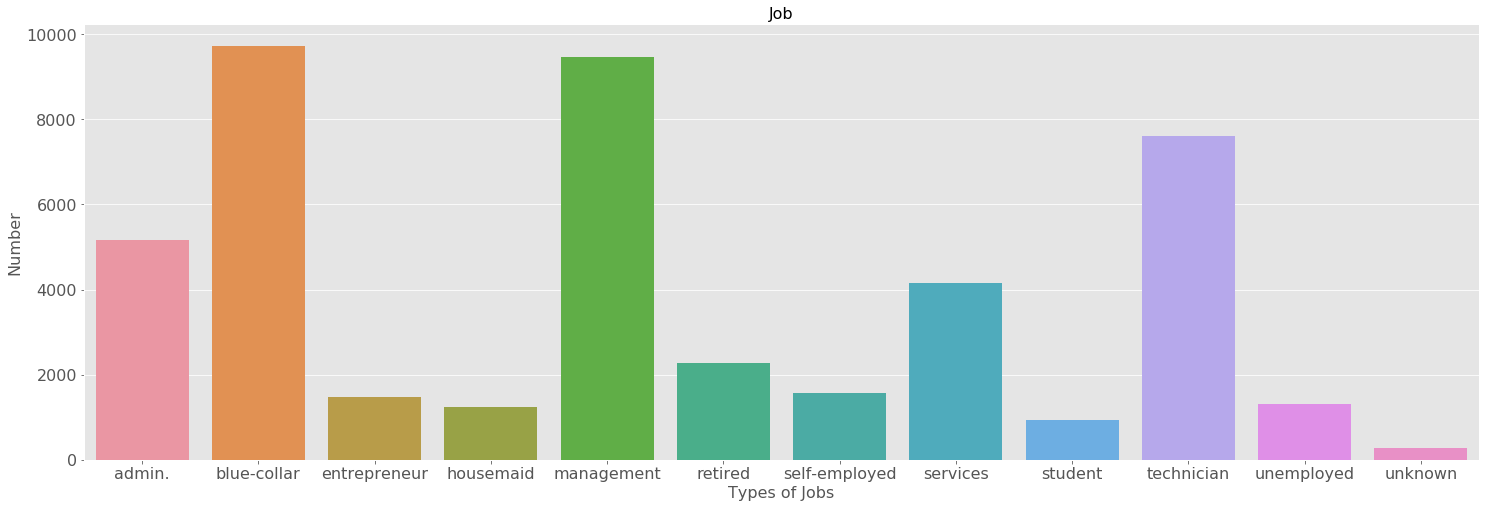

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = df[cols_cat])
ax.set_xlabel('Types of Jobs', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Job', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

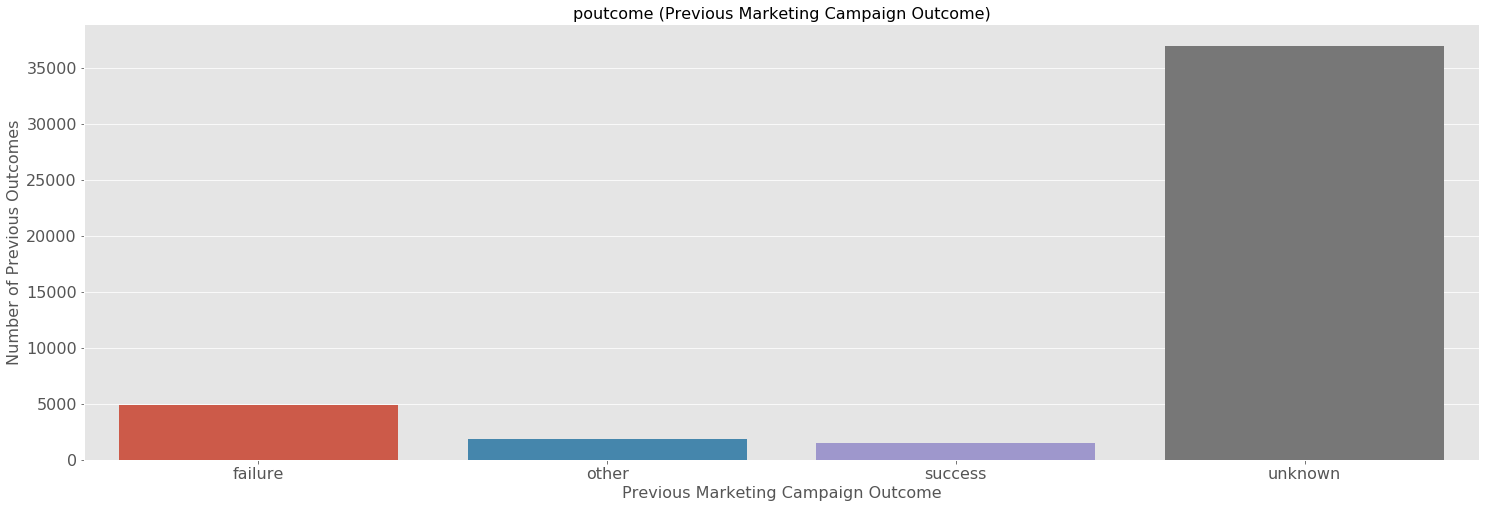

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'poutcome', data = df[cols_cat])
ax.set_xlabel('Previous Marketing Campaign Outcome', fontsize=16)
ax.set_ylabel('Number of Previous Outcomes', fontsize=16)
ax.set_title('poutcome (Previous Marketing Campaign Outcome)', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

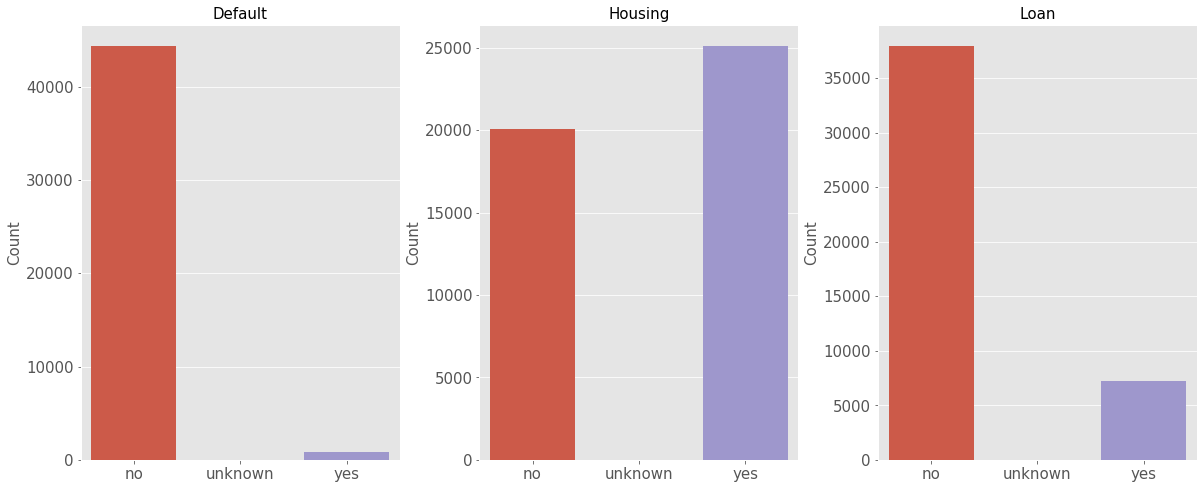

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df[cols_cat], ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = df[cols_cat], ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = df[cols_cat], ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

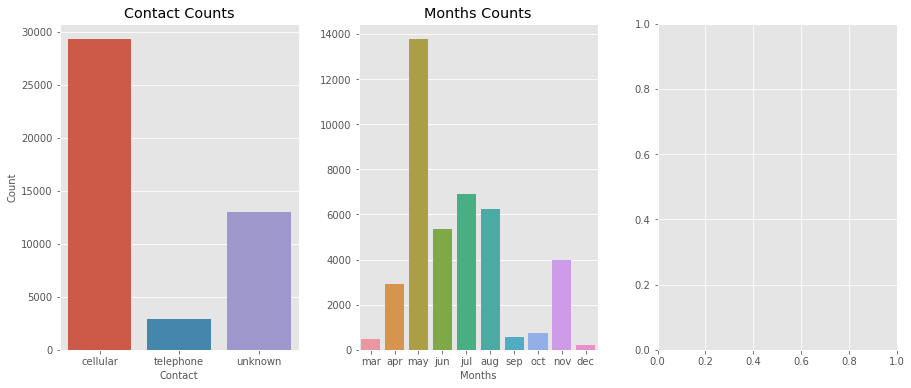

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(df[cols_cat]['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(df[cols_cat]['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [38]:
df = pd.concat([df,cols_new_cat], axis = 1)

In [39]:
cols_all_cat=list(cols_new_cat.columns)

In [40]:
df[cols_all_cat].head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [41]:
cols_num = ['age']

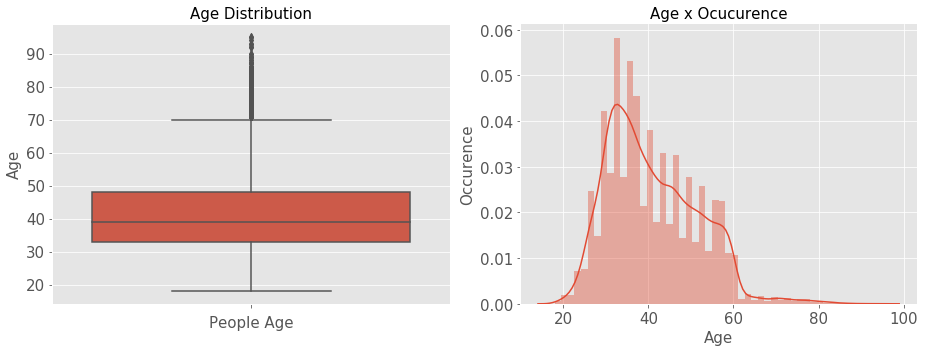

In [42]:
# Age is slightly skewed to younger
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df[cols_num], orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df[cols_num]['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

no    88.30
yes   11.70
Name: y, dtype: float64



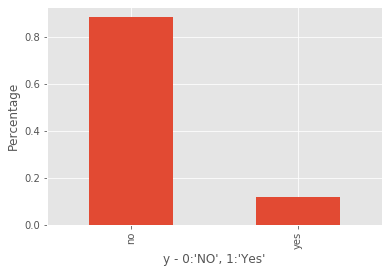

In [153]:
# Only 12% fall within the yes position in the y column also duration and pdays along with balance
print(df['y'].value_counts(normalize=True)*100)
print()
df['y'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("y - 0:'NO', 1:'Yes'")
plt.ylabel("Percentage")
plt.show()

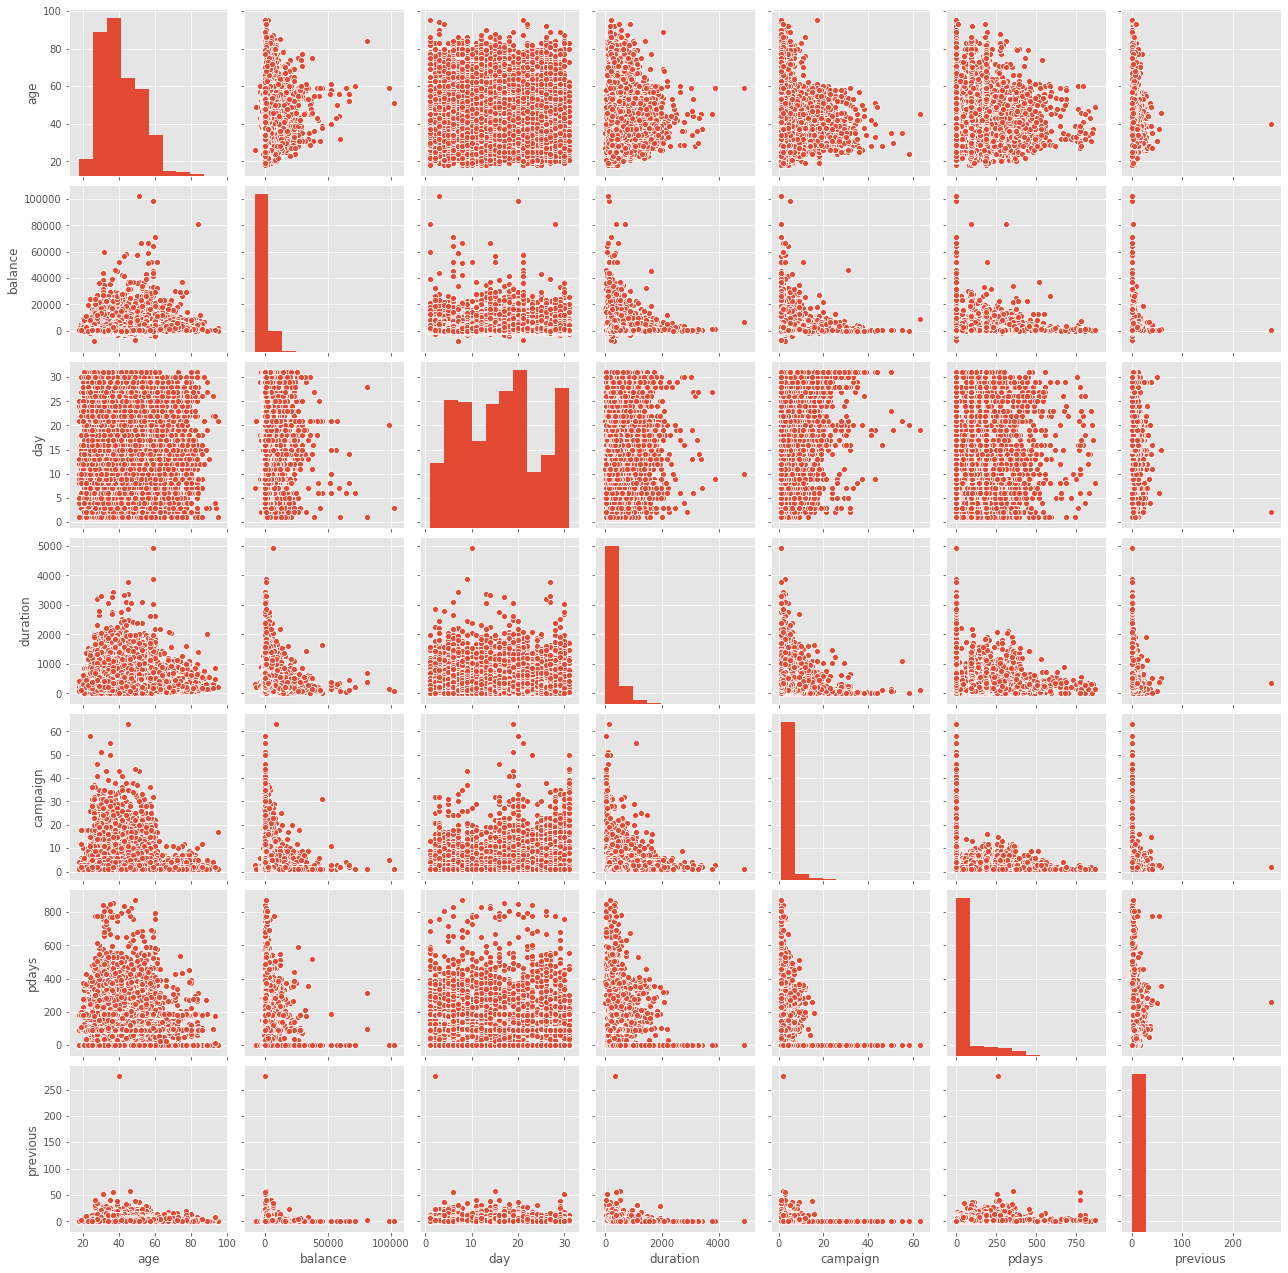

In [164]:
# Negative correlations between duration and campaign data. 
Data_bivaritate = df.iloc[:, 0:17]
sns.pairplot(Data_bivaritate)

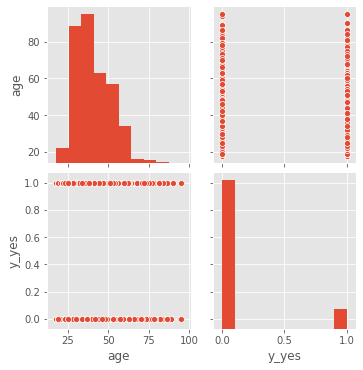

In [169]:
sns.pairplot(df_clean[['age', 'y_yes']]);

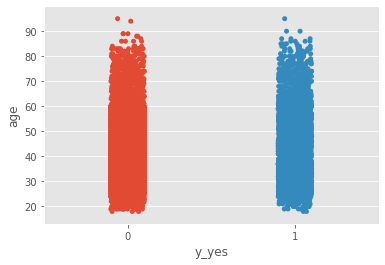

In [174]:
sns.stripplot(df_clean['y_yes'], df_clean['age'], jitter=True);

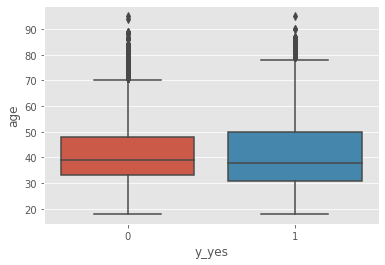

In [176]:
sns.boxplot(df_clean['y_yes'], df_clean['age']);

# Preparing data/spliting for Logistic Regression #1

In [44]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    f1 = 2 * (precision * recall) / (precision + recall)
   
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print('f1:%.3f'%f1)
    print(' ')
    return auc, accuracy, recall, precision, specificity, f1

In [45]:
x = df.loc[:, df.columns != 'y']  # independent variables

y = df.loc[:, df.columns == 'y']

In [46]:
x = pd.get_dummies(x,drop_first=True)

In [47]:
y.head()

,y
0,no
1,no
2,no
3,no
4,no


In [48]:
x.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [49]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [50]:
xtrain.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
6149,32,-238,27,427,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
12403,34,-478,27,111,4,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
21645,32,266,19,168,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29580,36,13,3,150,4,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
31245,23,486,3,87,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [51]:
xtest.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3610,42,2519,15,262,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
11677,37,2209,20,167,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
33018,32,923,17,819,4,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
44323,53,306,28,388,3,181,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
8119,32,257,2,183,5,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [52]:
y.shape

(45211, 1)

In [181]:
from sklearn.linear_model import LogisticRegression   

model = LogisticRegression(random_state=1)  

model.fit(xtrain, ytrain)

C:\Users\P67ST\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\P67ST\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
y_predict = model.predict(xtest)  

print("Trainig accuracy",model.score(xtrain,ytrain))  
print()
print("Testing accuracy",model.score(xtest, ytest))

Trainig accuracy 0.8932916232186305

Testing accuracy 0.8930256561486287


In [192]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [193]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Logistic Regression Model #2

In [82]:
dummy_df=pd.get_dummies(df_clean,drop_first=True)

In [83]:
x=dummy_df.drop("y_yes",axis=1)
y=dummy_df["y_yes"]


#split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


from sklearn.linear_model import LinearRegression # import the functions
lm=LinearRegression() #call the function
lm.fit(x_train,y_train)# fit the model
print("Intercept of the linear equation:",lm.intercept_) # see the intercept
print()
print("COefficients of the equation are:")
print(lm.coef_)# see the coefficients
print()

#see the error parameters
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#make prediction
pred=lm.predict(x_test) #predicting values of y for all the xtest rows

print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print()
print("RMSE:",mean_squared_error(y_test,pred)**0.5)
print()
print("R2 Squarred:",r2_score(y_test, pred))

Intercept of the linear equation: 0.1924003203300357

COefficients of the equation are:
[ 3.83238455e-05  1.96888934e-06  5.82097800e-04 -4.52199544e-03
 -3.37747371e-05  2.36789020e-03 -4.88588352e-03 -1.62672402e-02
 -2.58893147e-02  2.53617454e-04  5.88980054e-02 -7.37490824e-03
 -6.88989042e-03  7.72921488e-02  1.73589966e-03  8.91511450e-03
 -1.38777878e-16 -1.59033076e-02  1.41021831e-02  8.17105501e-03
  2.71572056e-02  2.18575158e-16 -4.80569340e-02 -2.87505064e-02
 -2.07176805e-02 -9.35375641e-02 -1.01714104e-01  1.47992465e-01
 -4.66151042e-02 -1.23564870e-01 -8.31670724e-02  2.89862775e-03
  2.79104038e-01 -4.61685304e-02 -9.73876414e-02  1.42251922e-01
  1.63326793e-01  2.31481489e-02  4.33742951e-01  8.07840056e-03]

Mean Absolute Error: 0.1742524759690133

RMSE: 0.29241557059425577

R2 Squarred: 0.16560056342426321


In [84]:
dummy_df.head(5)

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,1,-1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
5,35,231,5,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
6,28,447,5,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [85]:
x_train.head()

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
39750,57,0,28,3,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
19900,45,3168,8,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32563,39,0,17,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2493,52,1635,13,1,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
15286,40,2998,18,3,-1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [86]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear")
model.fit (x_train, y_train)
y_predict = model.predict (x_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_

In [87]:
model_score = model.score(x_test, y_test)
print(model_score)

0.8945824972989659


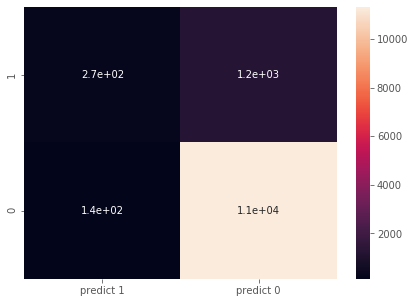

In [88]:
cm=metrics.confusion_matrix(y_test, y_predict, labels= [1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1", "0"]],
                     columns = [i for i in ["predict 1", "predict 0"]])
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(df_cm, annot=True)

In [190]:
x=dummy_df.drop("y_yes",axis=1)
y=dummy_df["y_yes"]


#split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


from sklearn.linear_model import LinearRegression # import the functions
lm=LinearRegression() #call the function
lm.fit(x_train,y_train)# fit the model
print("Intercept of the linear equation:",lm.intercept_) # see the intercept
print()
print("COefficients of the equation are:")
print(lm.coef_)# see the coefficients
print()

#see the error parameters
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#make prediction
pred=lm.predict(x_test) #predicting values of y for all the xtest rows

print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print()
print("RMSE:",mean_squared_error(y_test,pred)**0.5)
print()
print("R2 Squarred:",r2_score(y_test, pred))

Intercept of the linear equation: 0.1924003203300357

COefficients of the equation are:
[ 3.83238455e-05  1.96888934e-06  5.82097800e-04 -4.52199544e-03
 -3.37747371e-05  2.36789020e-03 -4.88588352e-03 -1.62672402e-02
 -2.58893147e-02  2.53617454e-04  5.88980054e-02 -7.37490824e-03
 -6.88989042e-03  7.72921488e-02  1.73589966e-03  8.91511450e-03
 -1.38777878e-16 -1.59033076e-02  1.41021831e-02  8.17105501e-03
  2.71572056e-02  2.18575158e-16 -4.80569340e-02 -2.87505064e-02
 -2.07176805e-02 -9.35375641e-02 -1.01714104e-01  1.47992465e-01
 -4.66151042e-02 -1.23564870e-01 -8.31670724e-02  2.89862775e-03
  2.79104038e-01 -4.61685304e-02 -9.73876414e-02  1.42251922e-01
  1.63326793e-01  2.31481489e-02  4.33742951e-01  8.07840056e-03]

Mean Absolute Error: 0.1742524759690133

RMSE: 0.29241557059425577

R2 Squarred: 0.16560056342426321


In [90]:
dummy_df.head(5)

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,1,-1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
5,35,231,5,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
6,28,447,5,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [91]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(solver="liblinear")
model1.fit (x_train, y_train)
y_predict = model1.predict (x_test)

coef_df = pd.DataFrame(model1.coef_)
coef_df['intercept'] = model1.intercept_
print(coef_df)

      0    1    2     3     4    5     6     7     8     9  ...   31   32  \
0 -0.00 0.00 0.00 -0.09 -0.00 0.02 -0.17 -0.26 -0.37 -0.02  ... 0.23 1.23   

     33    34   35   36   37   38   39  intercept  
0 -0.52 -0.89 0.56 0.68 0.16 2.02 0.04      -0.82  

[1 rows x 41 columns]


In [92]:
model1_score = model1.score(x_test, y_test)
print(model_score)

0.8945824972989659


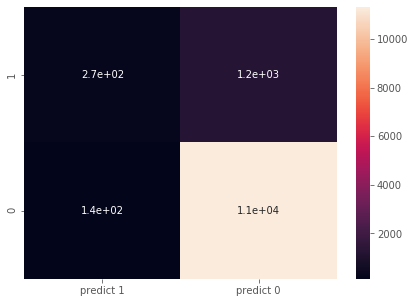

In [93]:
cm=metrics.confusion_matrix(y_test, y_predict, labels= [1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1", "0"]],
                     columns = [i for i in ["predict 1", "predict 0"]])
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(df_cm, annot=True)

In [96]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)

C:\Users\P67ST\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
y_predict = logreg.predict(x_test)

In [98]:
def draw_cm( actual, predicted):
    cm1 = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = [0,1], yticklabels = [0,1])
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Confusion Matrix


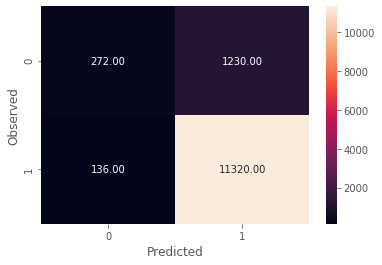

None

Recall: 0.010652463382157125
precision: 0.64

F1 Score: 0.020956123117223318

Roc Auc Score: 0.5049334244285087


In [99]:
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print("precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:", f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

C:\Users\P67ST\anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'lowe righ'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


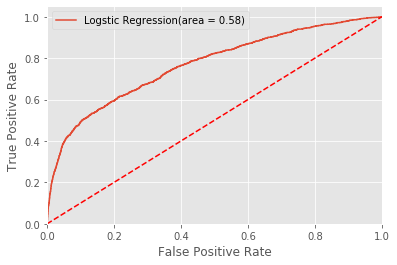

In [100]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model1.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logstic Regression(area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lowe righ")
plt.savefig('Log_ROC')
plt.show()

# Tuning Logistic Model and Testing other potential models for a better fit

In [101]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [102]:
train_score=[]
test_score=[]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for i in solver:
    model2 = LogisticRegression(random_state=42,penalty='l2', C = 0.75, solver=i)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
    print(solver)
    print()
    print(train_score)
    print()
    print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.892]

[0.895]
['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.892, 0.892]

[0.895, 0.895]
['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.892, 0.892, 0.892]

[0.895, 0.895, 0.895]
['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.892, 0.892, 0.892, 0.892]

[0.895, 0.895, 0.895, 0.895]
['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.892, 0.892, 0.892, 0.892, 0.892]

[0.895, 0.895, 0.895, 0.895, 0.895]


# Decision Tree Model Entropy

In [104]:
from sklearn.model_selection import train_test_split

features = [col for col in df_clean.columns if col != 'y_yes']

X_train, X_test, y_train, y_test = train_test_split(df_clean[features], df_clean['y_yes'], test_size=.3, random_state=22)
X_train.shape, X_test.shape

((30235, 40), (12958, 40))

In [105]:
model_entropy = DecisionTreeClassifier(criterion='entropy')

In [106]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [107]:
print("Train: %.2f" % model_entropy.score(X_train, y_train))  
print("Test: %.2f" % model_entropy.score(X_test, y_test))

Train: 1.00
Test: 0.84


In [108]:
a = model_entropy.score(X_train, y_train)
print(f"Train: {a:.2f}") 

Train: 1.00


In [109]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [110]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))

Train: 0.89
Test: 0.90


In [111]:
y_train.value_counts()

0    26667
1     3568
Name: y_yes, dtype: int64

In [114]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  


In [116]:
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

In [117]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11398,107
1,1244,209


# Identify Important Features

In [121]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
poutcome_success,0.52
contact_unknown,0.16
housing_yes,0.09
pdays,0.06
month_jul,0.05
month_aug,0.05
day,0.02
month_mar,0.02
age,0.01
month_oct,0.01


In [122]:
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf

,Method,accuracy
0,Decision Tree,0.90


# Decision Tree #2 Random Forest 

In [123]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [124]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [127]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.90
0,Random Forest,0.90
0,Random Forest,0.90


In [138]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [139]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [140]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.90
0,Random Forest,0.90
0,Random Forest,0.90
0,Adaboost,0.90


# Bagging and Boosting for better performance 

In [141]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [142]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [143]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.90
0,Random Forest,0.90
0,Random Forest,0.90
0,Adaboost,0.90
0,Bagging,0.90


# Full model comparison with boosting and bagging implemented

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [145]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [146]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.90
0,Random Forest,0.90
0,Random Forest,0.90
0,Adaboost,0.90
0,Bagging,0.90
0,Gradient Boost,0.90


In [147]:
import sklearn
print(sklearn.__version__)

0.22.1


In [148]:
estimators = [
    ('dt', DecisionTreeClassifier(criterion = "entropy", max_depth=4)),
    ('rf', RandomForestClassifier(n_estimators = 50)),
    ('ab', AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)),
    ('bg', BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)),
    ('gb', GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
]
estimators

[('dt',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                         max_depth=4, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best')),
 ('rf',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=50,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0,

In [152]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression()
)

clf.fit(X_train, y_train).score(X_test, y_test)

0.8979780830375058

In [151]:
resultsDf

,Method,accuracy
0,Decision Tree,0.90
0,Random Forest,0.90
0,Random Forest,0.90
0,Adaboost,0.90
0,Bagging,0.90
0,Gradient Boost,0.90
